# Assignment 1.

## Assignment 1A: Anscombe's quartet


Start by downloading these four datasets: [Data 1](https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data1.tsv), [Data 2](https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data2.tsv), [Data 3](https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data3.tsv), and [Data 4](https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data4.tsv). The format is `.tsv`, which stands for _tab separated values_. 
Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.  

It's ok to just download these files to disk by right-clicking on each one, but if you use Python and _urllib_ or _urllib2_ to get them, I'll really be impressed. If you don't know how to do that, I recommend opening up Google and typing "download file using Python" or something like that. When interpreting the search results remember that _stackoverflow_ is your friend.

In [1]:
import tempfile
import os.path
import urllib
import csv
import numpy as np
import dateutil.parser

def download_file(url, file_name) :
    #search for the file in the temp dir
    tmp_dir = tempfile.gettempdir()
    file_path = tmp_dir+"/"+file_name
    if not os.path.isfile(file_path) :
        urllib.urlretrieve(url, file_path)
        print file_name+" downloaded"
    print "File "+file_name+" is ready"
    return file_path

def read_data_file(file_path):
    infile = open(file_path, 'r')    # open the file for reading
    reader = csv.reader(infile, delimiter='\t')
    data_csv = []
    # read through the CSV one line at a time
    for i,line in enumerate(reader):
        # assign the various fields in the line to variables
        record = {}
        record["x"] = int(line[0])
        record["y"] = float(line[1])
        #print record
        data_csv.append(record)
    print "loaded: "+(file_path.split("/")[-1])
    return data_csv

data = []
for i in range(1,5):
    data_file = download_file("https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data%d.tsv"%i, "data%d.tsv"%i)
    data.append(read_data_file(data_file))
    print ""

File data1.tsv is ready
loaded: data1.tsv

File data2.tsv is ready
loaded: data2.tsv

File data3.tsv is ready
loaded: data3.tsv

File data4.tsv is ready
loaded: data4.tsv



* Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset. 
* Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting. 

In [2]:
for i,data_table in enumerate(data):
    print "data%d x mean: % 6.2f"%(i,np.mean([row["x"] for row in data_table]))
    print "data%d y mean: % 6.2f"%(i,np.mean([row["y"] for row in data_table]))
    print ""

data0 x mean:   9.00
data0 y mean:   7.50

data1 x mean:   9.00
data1 y mean:   7.50

data2 x mean:   9.00
data2 y mean:   7.50

data3 x mean:   9.00
data3 y mean:   7.50



* Now calculate the variance for all of the various sets of $x$- and $y$-values (to three decimal places).

In [3]:
for i,data_table in enumerate(data):
    print "data%d x variance: % 6.3f"%(i,np.var([row["x"] for row in data_table]))
    print "data%d y variance: % 6.3f"%(i,np.var([row["y"] for row in data_table]))
    print ""

data0 x variance:  10.000
data0 y variance:  3.752

data1 x variance:  10.000
data1 y variance:  3.752

data2 x variance:  10.000
data2 y variance:  3.748

data3 x variance:  10.000
data3 y variance:  3.748



* Use `numpy` to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also to three decimal places).

In [4]:
for i,data_table in enumerate(data):
    x = [row["x"] for row in data_table]
    y = [row["y"] for row in data_table]
    
    coef = np.corrcoef(x,y)
    print "data%d Pearson correlation: % 6.3f"%(i,coef[0][1])

data0 Pearson correlation:  0.816
data1 Pearson correlation:  0.816
data2 Pearson correlation:  0.816
data3 Pearson correlation:  0.817


* The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this
```
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
```

In [5]:
from scipy import stats
slope_regress = []
for i,data_table in enumerate(data):
    x = [row["x"] for row in data_table]
    y = [row["y"] for row in data_table]
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    slope_regress.append([slope,intercept])
    print "data%d slope: % 6.2f, intercept: % 6.2f"%(i, slope, intercept)


data0 slope:   0.50, intercept:   3.00
data1 slope:   0.50, intercept:   3.00
data2 slope:   0.50, intercept:   3.00
data3 slope:   0.50, intercept:   3.00


* Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/anscombe.png).)

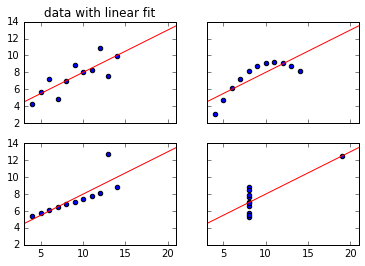

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

plt.close('all')
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax = []
ax.append(ax1)
ax.append(ax2)
ax.append(ax3)
ax.append(ax4)
ax1.set_title('data with linear fit')
for i,data_table in enumerate(data):
    x = [row["x"] for row in data_table]
    y = [row["y"] for row in data_table]
    ax[i].scatter(x, y)
    X_plot = np.linspace(0,25,20)
    m=slope_regress[i][0]
    b=slope_regress[i][1]
    ax[i].plot(X_plot, m*X_plot + b, color='r')
    ax[i].set_xlim([3, 21])
    ax[i].set_ylim([2, 14])
plt.show()

* Explain - in your own words - what you think my point with this exercise is.

## Assignment 1B: Slicing data

We investigate the types of crime and how they take place across San Francisco's police districts.

* We'll be combining information about _PdDistrict_ and _Category_ to explore differences between SF's neighborhoods. First, simply list the names of SF's 10 police districts.
* Which has the most crimes? Which has the most focus crimes?
* Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going
  - First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. That's simply a normalized version of [this plot](https://raw.githubusercontent.com/suneman/socialdataanalysis2016/master/files/categoryhist.png). Let's call it `P(crime)`.
  - Next, we calculate that same probability distribution _but for each PD district_, let's call that `P(crime|district)`.
  - Now we look at the ratio `P(crime|district)/P(crime)`. That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs _more frequently_ within that district. If it's smaller than one, it means that the crime is _rarer within the district in question_ than in the city as a whole.
  - For each district plot these ratios for the 14 focus crimes. My plot looks like this
    ![Histograms](https://raw.githubusercontent.com/suneman/socialdataanalysis2016/master/files/neighborhood_ratios.png)
  - Comment on the top crimes in _Tenderloin_, _Mission_, and _Richmond_. Does this fit with the impression you get of these neighborhoods on Wikipedia?
  - Even though we only plotted the ratios for our 14 focus crimes, I asked you to calculate the ratios based on all crime categories. Why do you think I wanted to include all crime types in the calculation?

In [5]:
import tempfile
import os.path
import urllib
#search for the file in the temp dir
file_path = download_file('https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD',"SFPD_Incidents_-_from_1_January_2003.csv")

File SFPD_Incidents_-_from_1_January_2003.csv is ready


In [ ]:
import csv
import numpy
import dateutil.parser

infile = open(file_path, 'r')    # open the file for reading
reader = csv.DictReader(infile, delimiter=',')

data_csv = []
# read through the CSV one line at a time
for i,line in enumerate(reader):
    # assign the various fields in the line to variables
    crime = {}
    crime["category"] = line["Category"]
    crime["time"] = dateutil.parser.parse(line["Date"]+" "+line["Time"])
    crime["neighborhood"] = line["PdDistrict"]
    crime["latitude"], crime["longitude"] = eval(line["Location"])
    data_csv.append(crime)
print "File loaded"

KeyboardInterrupt: 

In [ ]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE',
                  'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC',
                  'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY',
                  'DISORDERLY CONDUCT'])

districts = set(map(lambda a: a['neighborhood'], data_csv))

# removes the empty string
districts = filter(None, districts)

## Assignment 1C: KNN


The goal of this exercise is to create a useful real-world version of the example on pp153 in DSFS. We know from last week's exercises that the focus crimes `PROSTITUTION`, `DRUG/NARCOTIC` and `DRIVING UNDER THE INFLUENCE` tend to be concentrated in certain neighborhoods, so we focus on those crime types since they will make the most sense a KNN - map. 

* Next, it's time to set up your model based on the actual data. You can use the code supplied in the book or try out `scikit-learn`'s [`KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). If you end up using the latter (recommended), you may want to check out [this example](http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/tutorial/plot_knn_iris.html) to get a sense of the usage.
  - You don't have to think a lot about testing/trainig and accuracy for this exercise. We're mostly interested in creating a map that's not too problematic. **But** do calculate the number of observations of each crime-type respectively. You'll find that the levels of each crime varies (lots of drug arrests, an intermediate amount of prostitiution registered, and very little drunk driving in the dataset). Since the algorithm classifies each point according to it's neighbors, what could a consequence of this imbalance in the number of examples from each class mean for your map?
  - You can make the dataset 'balanced' by grabbing an equal number of examples from each crime category. How do you expect that will change the KNN result? In which situations is the balanced map useful - and when is the map that data in proportion to occurrences useful? Choose which map you will work on in the following. 
* Now create an approximately square grid of point that runs over SF. You get to decide the grid-size, but I recommend somewhere between $50 \times 50$ and $100 \times 100$ points. I recommend plotting using `geoplotlib.dot()`. 
* Visualize your model by coloring the grid, coloring each grid point according to it's category. Create a plot of this kind for models where each point is colored according to the majority of its 5, 10, and 30 nearest neighbors. Describe what happens to the map as you increase the number of neighbors, `K`.  

**NOTE**: To get a map only of SF, you need to create your own * BoundingBox * which can be done in the following way:
```
bbox = BoundingBox(north=max_lat, west=min_lon, south=min_lat, east=max_lon)
geoplotlib.set_bbox(bbox)
```

In [ ]:
print data[100]

In [ ]:
lat = [item["latitude"] for item in data]
lon = [item["longitude"] for item in data]
geo_data_for_plotting = {"lat": lat,
                         "lon": lon}

* Begin by using `geoplotlib` to plot all incidents of the three crime types on their own map using [`geoplotlib.kde()`](https://github.com/andrea-cuttone/geoplotlib/blob/master/examples/kde.py). This will give you an idea of how the varioius crimes are distributed across the city.

In [ ]:
import geoplotlib
from geoplotlib.utils import BoundingBox, DataAccessObject
geoplotlib.kde(geo_data_for_plotting, bw=5, cut_below=1e-4)
geoplotlib.set_bbox(BoundingBox(north=37.8, west=-122.5, south=37.7, east=-122.3))
geoplotlib.inline()

## Assignment 1D: Multiple regression and the Red Baron

Investigate Chief Suneman's idea is that the Red Baron might pick the time of his attacks according to a pattern that we can detect using the powers of data science.

If he's right, we can identify the time of the next attack, which will help us end this insanity once and for all. Well, let's see if he is right!

* Start from all cases having `Red Baron` in the resolution field and use the day of the week to predict the hour of the day when he is attacking, e.g. use **linear regression** to infer the hour of the day based on the weekday! Again, take 4/5 of the data for training and then calculate goodness of fit using $R^2$ on the rest 1/5. Don't forget to rescale your input variables! (Note 1: My goodness of fit after using the weekdays is only around 0.618). (Note 2: For multivariate regression, as always you can simply re-use the code in the DSFS book (Chapters 14-15) or scikit-learn).
* Now, add the crime year as well to the input variables! Did the goodness of fit improve? (Note: Mine did to 0.809)
* It is still low. Inspired by a movie he once watched, Chief Suneman yells: "Let's add the longitude of the crimes as well!" Is your prediction getting better? (It should, to around 0.993)
* Very nice! Why not add latitude as well? What do you find now?